# **1. Environment Set Up and Data Loading**

In [ ]:
import gdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import random

2023-12-20 02:01:07.466737: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-20 02:01:07.466874: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-20 02:01:07.550951: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-20 02:01:07.719165: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-20 02:01:09.633183: W tensorflow/compiler/tf2

In [ ]:
def download_and_load_npy(url):
    output_file = gdown.download(url, quiet=True)
    return np.load(output_file)


def plot_random_series(list_of_series):
    figure, ax = plt.subplots(3, 2, figsize=(10, 10), dpi=100)

    for i, idx in enumerate([1, 2, 10, 50, 70, 100]):
        axis = ax[i % 3, i % 2]
        axis.plot(list_of_series[idx])
        axis.set_title(f"series: {idx}")
    plt.tight_layout()

def remove_null_from_array(x):
    return x[x != 0]

In [ ]:
# Downloading and reading the .npy files
categories = download_and_load_npy("https://drive.google.com/uc?id=1UiZliu_AQdlkjRhVf61Cc0_iJNvIbSyJ")
training_dataset = download_and_load_npy("https://drive.google.com/uc?id=1hIkzsOiDMX5B7pwxyJkiOEBV1nW6_cOB")
valid_periods = download_and_load_npy("https://drive.google.com/uc?id=1nV6ugTmqf--NTzBZCpb80PO0YZmsjigs")

In [ ]:
tr_data = []
for i in range(len(training_dataset)):
    tr_data.append(remove_null_from_array(training_dataset[i]))

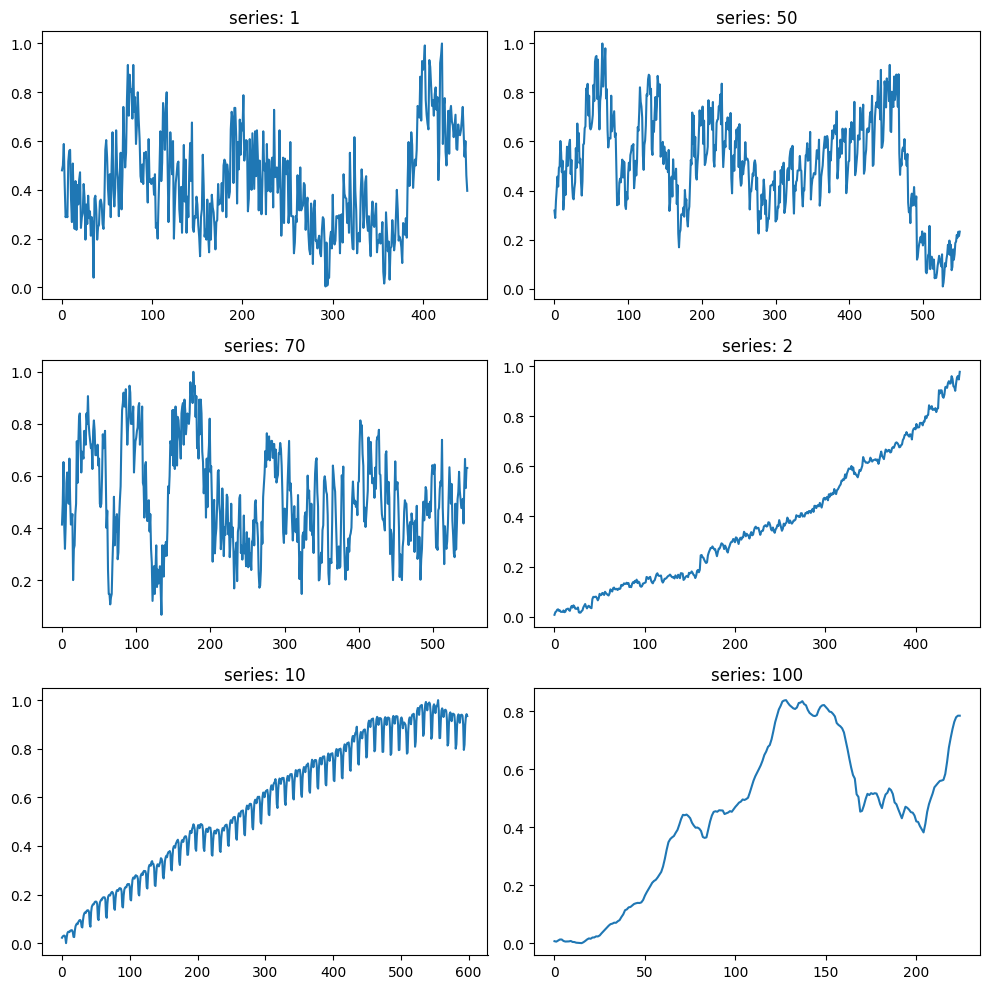

In [ ]:
plot_random_series(tr_data)

# **2. Data Preprocessing, Analysis and Visulization**


> The notebook proceeds with data preprocessing steps, creating masks for different categories and extracting data for each category. It prints the number of series, mean length, median length, and standard deviation of length for each category. It also calculates and prints the mean and standard deviation of values for each category. It also visualizes random series from each category using the plot_random_series function.


In [ ]:
import warnings
warnings.filterwarnings("ignore")


mask_A = (categories == 'A')
mask_B = (categories == 'B')
mask_C = (categories == 'C')
mask_D = (categories == 'D')
mask_E = (categories == 'E')
mask_F = (categories == 'F')

tr_data_A = np.array(tr_data)[mask_A]
tr_data_B = np.array(tr_data)[mask_B]
tr_data_C = np.array(tr_data)[mask_C]
tr_data_D = np.array(tr_data)[mask_D]
tr_data_E = np.array(tr_data)[mask_E]
tr_data_F = np.array(tr_data)[mask_F]

print("Number of series in category A:", len(tr_data_A))
print("Number of series in category B:", len(tr_data_B))
print("Number of series in category C:", len(tr_data_C))
print("Number of series in category D:", len(tr_data_D))
print("Number of series in category E:", len(tr_data_E))
print("Number of series in category F:", len(tr_data_F))
print(' ')

print("Mean Length of series in category A:", np.array([len(x) for x in tr_data_A]).mean())
print("Mean Length of series in category B:", np.array([len(x) for x in tr_data_B]).mean())
print("Mean Length of series in category C:", np.array([len(x) for x in tr_data_C]).mean())
print("Mean Length of series in category D:", np.array([len(x) for x in tr_data_D]).mean())
print("Mean Length of series in category E:", np.array([len(x) for x in tr_data_E]).mean())
print("Mean Length of series in category F:", np.array([len(x) for x in tr_data_F]).mean())
print(' ')

print("Median Length of series in category A:", np.median(np.array([len(x) for x in tr_data_A])))
print("Median Length of series in category B:", np.median(np.array([len(x) for x in tr_data_B])))
print("Median Length of series in category C:", np.median(np.array([len(x) for x in tr_data_C])))
print("Median Length of series in category D:", np.median(np.array([len(x) for x in tr_data_D])))
print("Median Length of series in category E:", np.median(np.array([len(x) for x in tr_data_E])))
print("Median Length of series in category F:", np.median(np.array([len(x) for x in tr_data_F])))
print(' ')

print("Standard Deviation of Length of series in category A:", np.array([len(x) for x in tr_data_A]).std())
print("Standard Deviation of Length of series in category B:", np.array([len(x) for x in tr_data_B]).std())
print("Standard Deviation of Length of series in category C:", np.array([len(x) for x in tr_data_C]).std())
print("Standard Deviation of Length of series in category D:", np.array([len(x) for x in tr_data_D]).std())
print("Standard Deviation of Length of series in category E:", np.array([len(x) for x in tr_data_E]).std())
print("Standard Deviation of Length of series in category F:", np.array([len(x) for x in tr_data_F]).std())
print(' ')

mean_A = np.mean([np.mean(x) for x in tr_data_A])
mean_B = np.mean([np.mean(x) for x in tr_data_B])
mean_C = np.mean([np.mean(x) for x in tr_data_C])
mean_D = np.mean([np.mean(x) for x in tr_data_D])
mean_E = np.mean([np.mean(x) for x in tr_data_E])
mean_F = np.mean([np.mean(x) for x in tr_data_F])

print("Mean of values in category A:", mean_A)
print("Mean of values in category B:", mean_B)
print("Mean of values in category C:", mean_C)
print("Mean of values in category D:", mean_D)
print("Mean of values in category E:", mean_E)
print("Mean of values in category F:", mean_F)
print(' ')

std_A = np.mean([np.std(x) for x in tr_data_A])
std_B = np.mean([np.std(x) for x in tr_data_B])
std_C = np.mean([np.std(x) for x in tr_data_C])
std_D = np.mean([np.std(x) for x in tr_data_D])
std_E = np.mean([np.std(x) for x in tr_data_E])
std_F = np.mean([np.std(x) for x in tr_data_F])

print("Standard Deviation of values in category A:", std_A)
print("Standard Deviation of values in category B:", std_B)
print("Standard Deviation of values in category C:", std_C)
print("Standard Deviation of values in category D:", std_D)
print("Standard Deviation of values in category E:", std_E)
print("Standard Deviation of values in category F:", std_F)


Number of series in category A: 5728
Number of series in category B: 10987
Number of series in category C: 10017
Number of series in category D: 10016
Number of series in category E: 10975
Number of series in category F: 277
 
Mean Length of series in category A: 277.08886173184356
Mean Length of series in category B: 164.77983070901976
Mean Length of series in category C: 206.83128681241888
Mean Length of series in category D: 216.0134784345048
Mean Length of series in category E: 162.1042369020501
Mean Length of series in category F: 193.5379061371841
 
Median Length of series in category A: 287.0
Median Length of series in category B: 156.0
Median Length of series in category C: 201.0
Median Length of series in category D: 237.0
Median Length of series in category E: 118.0
Median Length of series in category F: 171.0
 
Standard Deviation of Length of series in category A: 109.26253377326331
Standard Deviation of Length of series in category B: 116.07295061089457
Standard Deviation o

In [ ]:
tr_data_A.shape

(5728,)

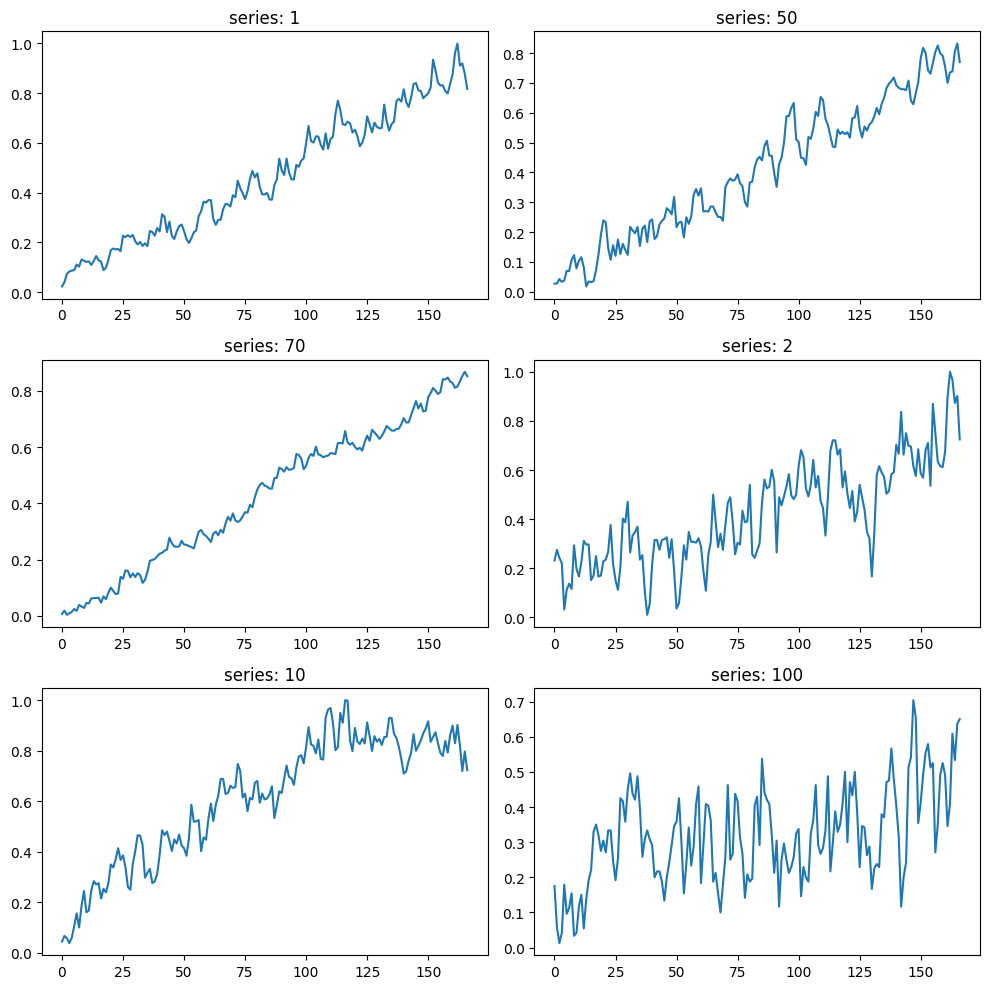

In [ ]:
plot_random_series(tr_data_A)

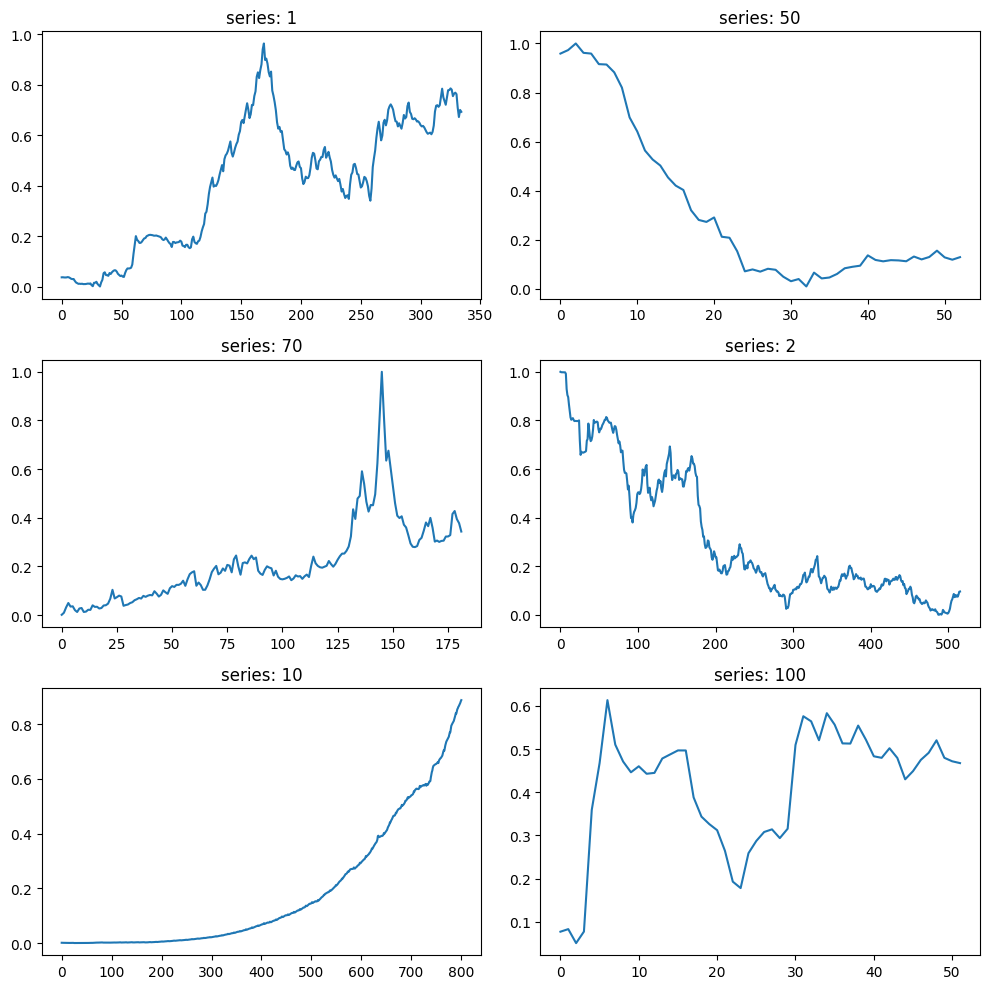

In [ ]:
plot_random_series(tr_data_B)

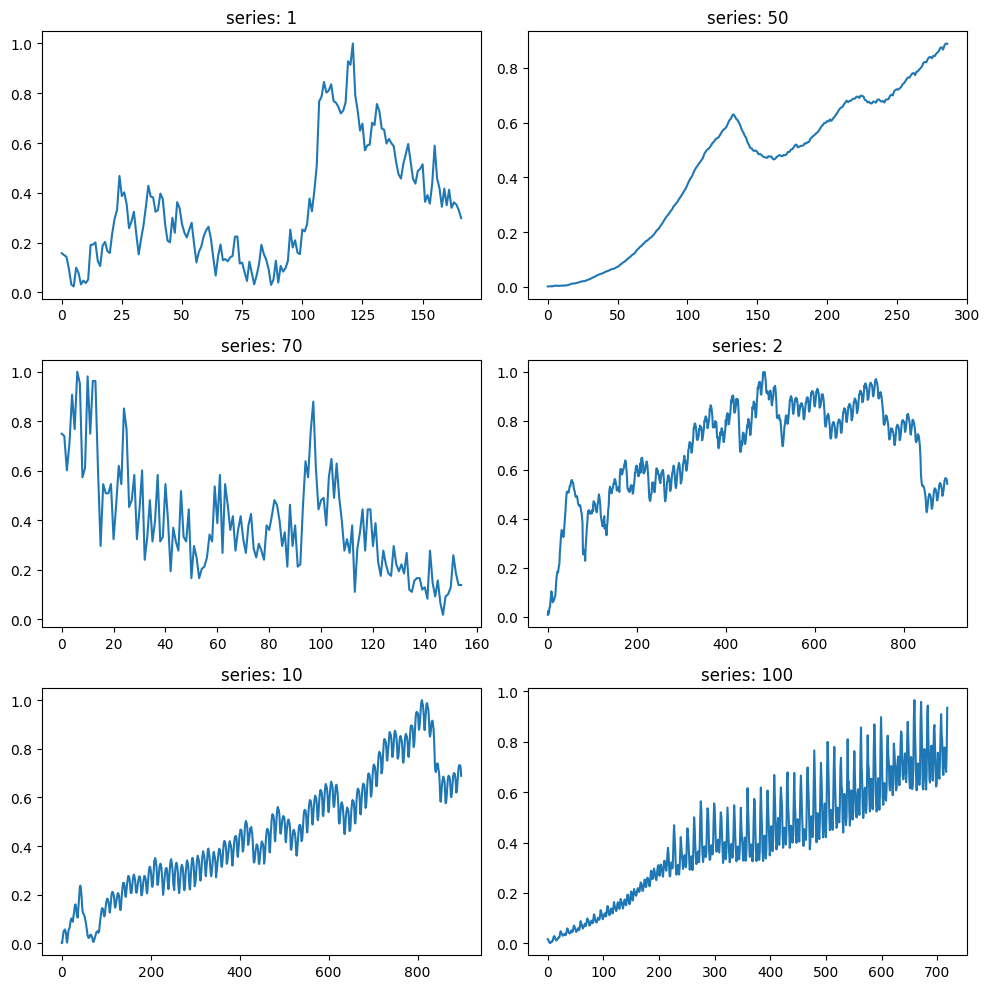

In [ ]:
plot_random_series(tr_data_C)

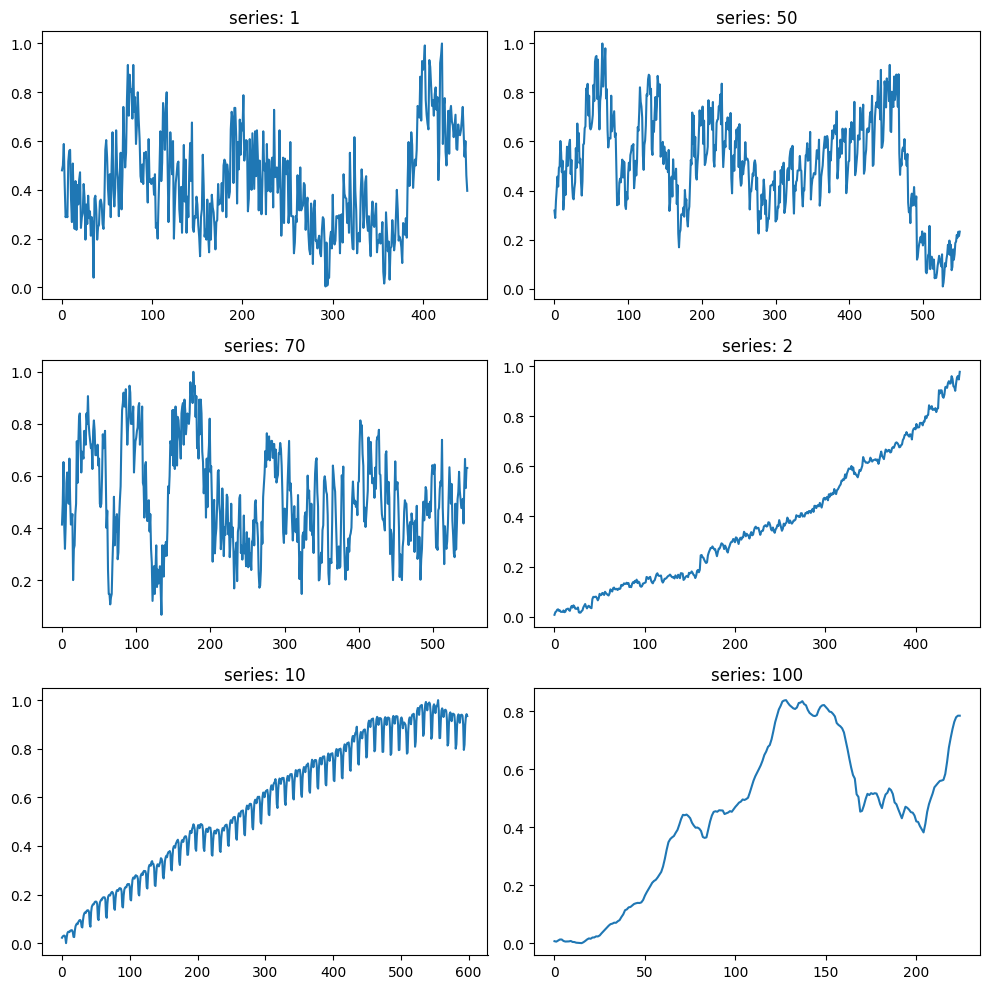

In [ ]:
plot_random_series(tr_data_D)

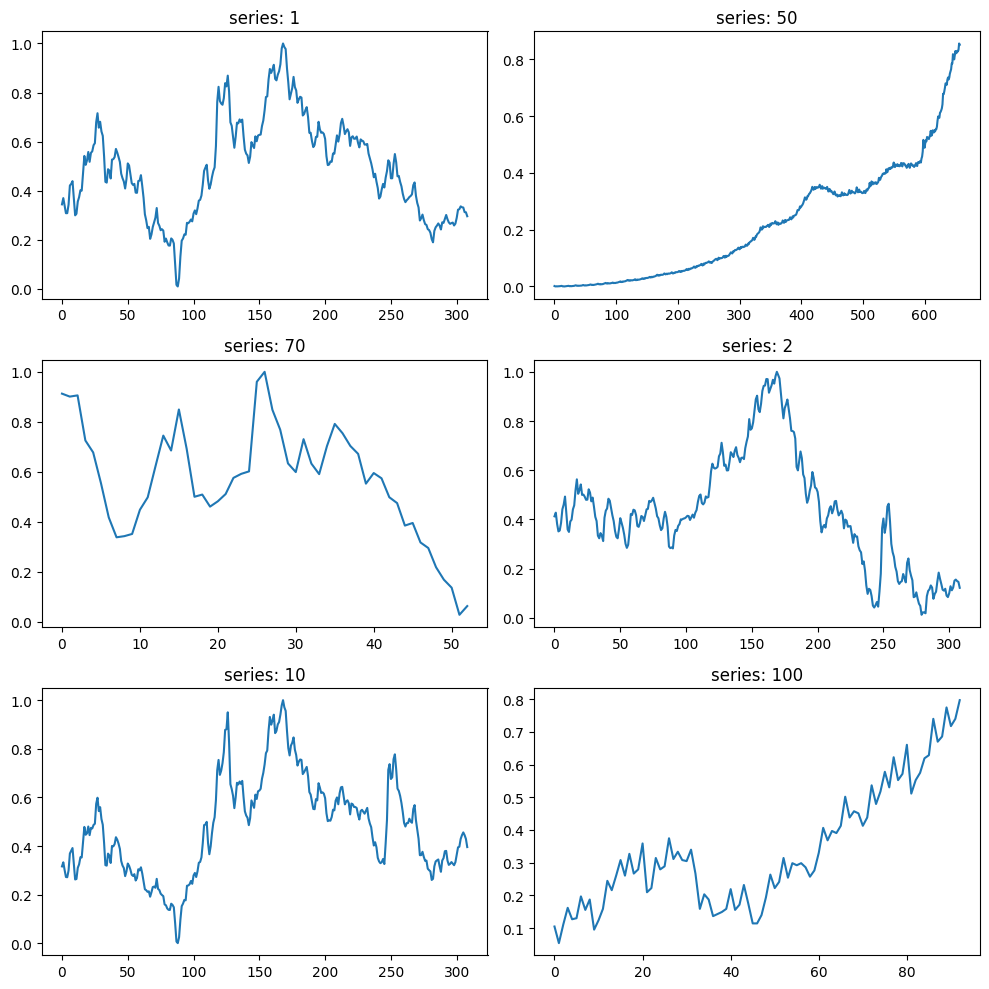

In [ ]:
plot_random_series(tr_data_E)

In [ ]:
len(tr_data_F)

277

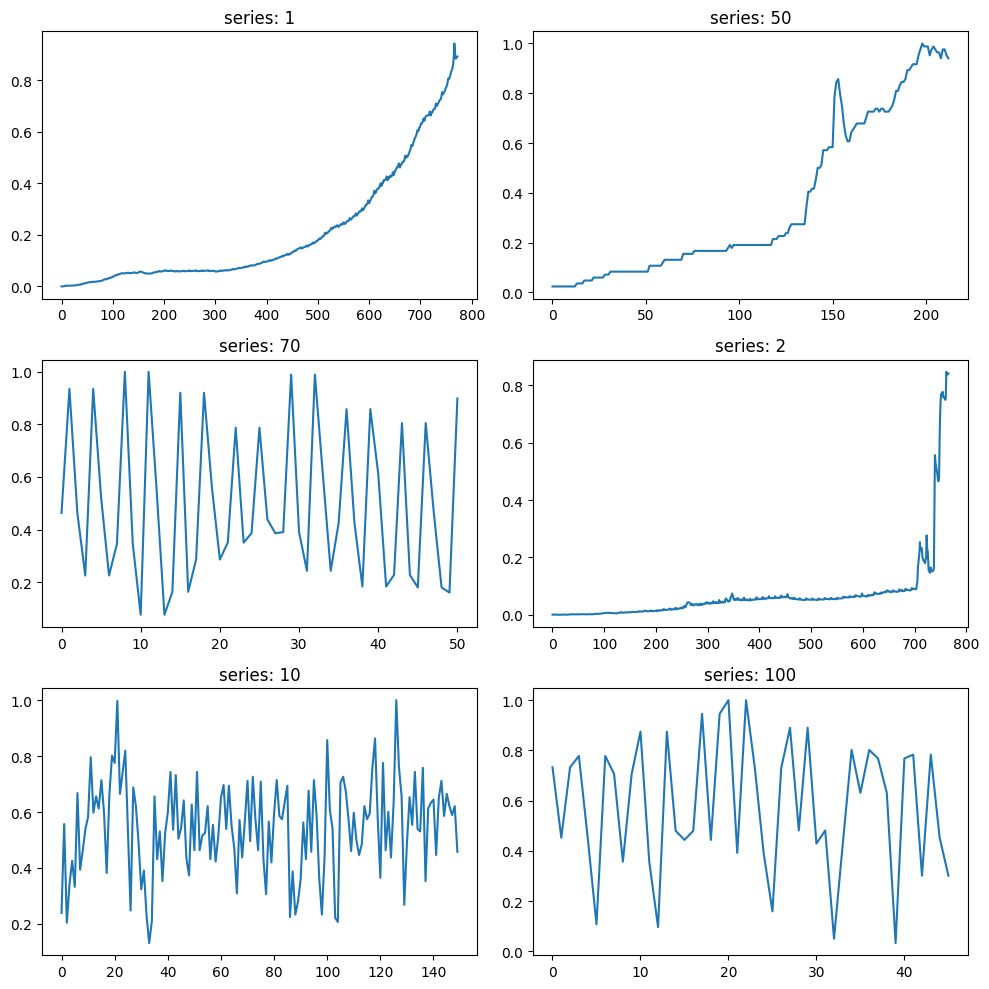

In [ ]:
plot_random_series(tr_data_F)